In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
#random training data generation
np.random.seed(42)
train_X1 = 2 * np.random.rand(200, 1) - 1.0
train_X2 = 2 * np.random.rand(200, 1) - 1.0
train_Y = (1 - train_X1) ** 2 + 100 * (train_X2 - train_X1 ** 2) ** 2

In [48]:
#random test data generation
np.random.seed(42)
test_X1 = 2 * np.random.rand(100, 1) - 1.0
test_X2 = 2 * np.random.rand(100, 1) - 1.0
test_Y = (1 - test_X1) ** 2 + 100 * (test_X2 - test_X1 ** 2) ** 2

In [49]:
def relu(z):
    return np.maximum(0,z)

In [50]:
def relu_derivative(z):
    return np.where(z <= 0, 0, 1)


In [51]:
def forward_propagation(X):
    u = np.dot(X, weights_input_to_hidden) + biases_hidden
    z = relu(u)  # Using the existing relu function
    yhat = np.dot(z, weights_hidden_to_output) + biases_output
    return z, yhat

In [52]:
def backpropagation(X, Y, z, yhat):
    error = yhat - Y
    hidden_gradients = error.dot(weights_hidden_to_output.T) * relu_derivative(z)
    hidden_weights_gradient = X.T.dot(hidden_gradients)
    hidden_biases_gradient = hidden_gradients.sum(axis=0, keepdims=True)

    output_weights_gradient = z.T.dot(error)
    output_biases_gradient = error.sum(axis=0, keepdims=True)

    return hidden_weights_gradient, hidden_biases_gradient, output_weights_gradient, output_biases_gradient


In [53]:
def update_parameters(derivatives, learning_rate):
    global weights_input_to_hidden, biases_hidden, weights_hidden_to_output, biases_output
    dwh, dbh, dw_out, db_out = derivatives

    weights_input_to_hidden -= learning_rate * dwh
    biases_hidden -= learning_rate * dbh

    weights_hidden_to_output -= learning_rate * dw_out
    biases_output -= learning_rate * db_out


In [54]:
def train(X, Y, num_epochs, learning_rate, print_interval):
    for epoch in range(num_epochs):
        # Forward Propagation
        z, yhat = forward_propagation(X)
        loss = np.mean((Y - yhat) ** 2)

        # Backpropagation
        gradients = backpropagation(X, Y, z, yhat)
        update_parameters(gradients, learning_rate)

        # Print loss every ... epochs
        if epoch % print_interval == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")

In [55]:
input_size = 2
hidden_size = 100
output_size = 1
scale = 0.01

weights_input_to_hidden = scale * np.random.randn(input_size, hidden_size)
weights_hidden_to_output = scale * np.random.randn(hidden_size, output_size)

biases_hidden = scale * np.random.randn(1, hidden_size)
biases_output = scale * np.random.randn(1, output_size)


In [56]:
total_epochs = 25001
learning_rate = 1e-4
print_frequency = 1e3

data_for_training = np.column_stack((train_X1, train_X2))
train(data_for_training, train_Y, total_epochs, learning_rate, print_frequency)


Epoch 0: Loss = 8803.1854
Epoch 1000: Loss = 76.5563
Epoch 2000: Loss = 32.6027
Epoch 3000: Loss = 14.6000
Epoch 4000: Loss = 10.7643
Epoch 5000: Loss = 8.6281
Epoch 6000: Loss = 7.2857
Epoch 7000: Loss = 5.9853
Epoch 8000: Loss = 5.4563
Epoch 9000: Loss = 5.1813
Epoch 10000: Loss = 4.3206
Epoch 11000: Loss = 4.5040
Epoch 12000: Loss = 3.6930
Epoch 13000: Loss = 3.7715
Epoch 14000: Loss = 3.8955
Epoch 15000: Loss = 3.6065
Epoch 16000: Loss = 3.4699
Epoch 17000: Loss = 3.3479
Epoch 18000: Loss = 3.0199
Epoch 19000: Loss = 3.0016
Epoch 20000: Loss = 2.9637
Epoch 21000: Loss = 2.9102
Epoch 22000: Loss = 2.7839
Epoch 23000: Loss = 2.6733
Epoch 24000: Loss = 2.5216
Epoch 25000: Loss = 2.4551


In [57]:
test_data_combined = np.column_stack((test_X1, test_X2))
_, predictions = forward_propagation(test_data_combined)
test_loss = np.mean((test_Y - predictions) ** 2)
print(test_loss)


5.972028098149477


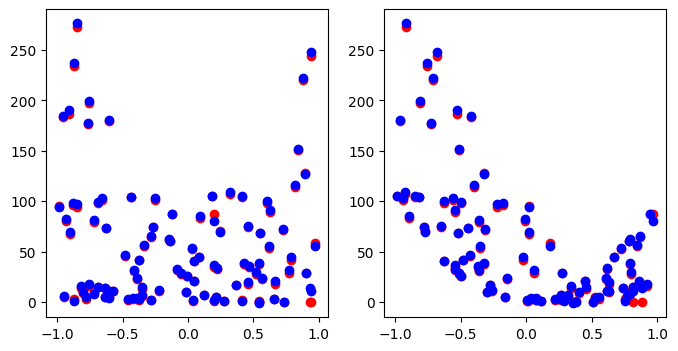

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.scatter(test_data_combined[:, 0], test_Y, color='red')
plt.scatter(test_data_combined[:, 0], predictions, color='blue')


plt.subplot(122)
plt.scatter(test_data_combined[:, 1], test_Y, color='red')
plt.scatter(test_data_combined[:, 1], predictions, color='blue')


plt.show()
